<a href="https://colab.research.google.com/github/Fatima-Alzaher/myproject/blob/main/Predicting_House_Prices_In_Saudi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Definition (Hypothesis):**
The objective of this project is to explore the factors influencing the sales performance of real estate properties. The hypothesis posits that various features, including price, neighborhood, administrative area, city, number of rooms, bathrooms, square meters (sqm), the presence of an elevator, availability of a driver, and the existence of a garden, may have a significant impact on property sales.

**Gather and Prepare Data:**
The data for this project has been sourced from Kaggle and includes the following features for several real estate properties:

- `price`: The selling price of the property.
- `neighborhood_name`: The name of the neighborhood where the property is located.
- `administritive_area`: The administrative area associated with the property.
- `city`: The city where the property is situated.
- `rooms`: The number of rooms in the property.
- `bathrooms`: The number of bathrooms in the property.
- `sqm`: The total square meters of the property.
- `elevator`: A binary indicator (0 or 1) representing the presence of an elevator.
- `bool_driver`: A binary indicator (0 or 1) representing the availability of a driver.
- `garden`: A binary indicator (0 or 1) representing the existence of a garden.

[For MY dataset Click here](https://www.kaggle.com/datasets/maha48/villas-price-dataset/data)

**Part 1: Importing Necessary Libraries and datasets**

In [51]:
# important some important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [52]:
# read the data
df = pd.read_csv("data.csv")

In [53]:
# see sample of data
df.sample(5)

,price,neighborhood_name,administritive_area,city,rooms,bathrooms,sqm,elevator,bool,driver,garden
1307,2000000.000,Al Yasmin,Riyadh,North Riyadh,7,6,315,0,0,0,0
1191,9000050.000,Ash Sheraa,Makkah,Jeddah,6,6,22,1,0,0,0
884,1200000.000,Ar Rimal,Riyadh,East Riyadh,5,5,300,0,0,0,0
318,1080000.000,Al Ghoroub,Riyadh,West Riyadh,4,5,238,0,0,0,0
272,1130000.000,Ar Rimal,Riyadh,East Riyadh,5,6,281,0,0,0,0


In [54]:
# check some information about daat
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                1417 non-null   float64
 1   neighborhood_name    1417 non-null   object 
 2   administritive_area  1396 non-null   object 
 3   city                 1417 non-null   object 
 4   rooms                1417 non-null   int64  
 5   bathrooms            1417 non-null   int64  
 6   sqm                  1417 non-null   int64  
 7   elevator             1417 non-null   int64  
 8   bool                 1417 non-null   int64  
 9   driver               1417 non-null   int64  
 10  garden               1417 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 121.9+ KB


In [55]:
# get fid of sceintific notification
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Display summary statistics
print(df['price'].describe())

count        1417.000
mean      1953097.606
std       5369451.376
min           111.000
25%       1050000.000
50%       1300000.000
75%       1750000.000
max     160000000.000
Name: price, dtype: float64


In [56]:
# some statistics for numerical columns
df.describe()

,price,rooms,bathrooms,sqm,elevator,bool,driver,garden
count,1417.000,1417.000,1417.000,1417.000,1417.000,1417.000,1417.000,1417.000
mean,1953097.606,4.709,5.143,917.824,0.221,0.139,0.148,0.035
std,5369451.376,1.199,1.342,14678.147,0.446,0.377,0.361,0.192
min,111.000,1.000,1.000,22.000,0.000,0.000,0.000,0.000
25%,1050000.000,4.000,4.000,268.000,0.000,0.000,0.000,0.000
50%,1300000.000,5.000,5.000,312.000,0.000,0.000,0.000,0.000
75%,1750000.000,5.000,6.000,390.000,0.000,0.000,0.000,0.000
max,160000000.000,7.000,7.000,420000.000,4.000,3.000,2.000,2.000


### Some Visualizations that help us understand the data

**What is the distribution of prices?**

<ipython-input-57-42c9d519ffa4>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


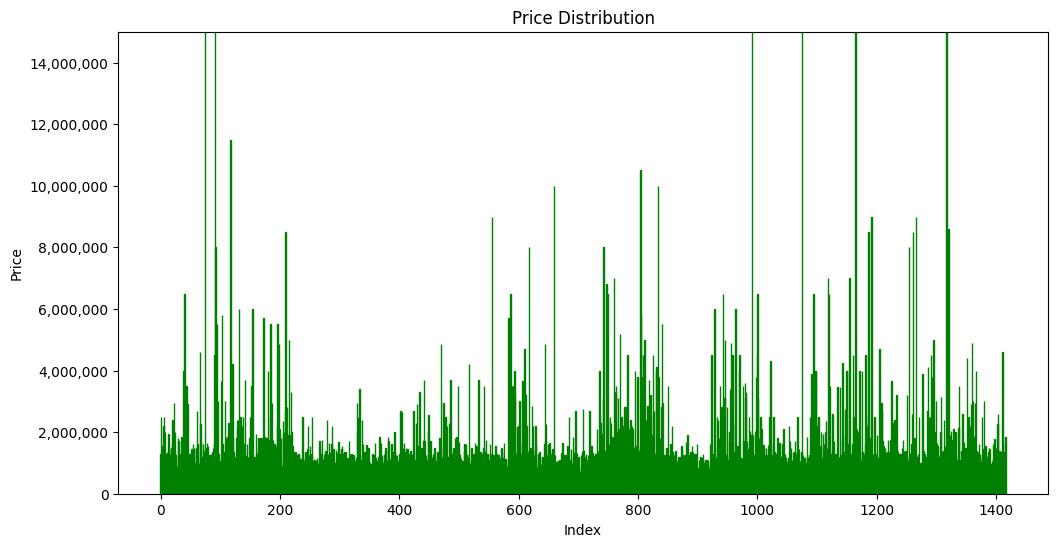

In [57]:
# Assuming 'train_data' is your DataFrame with 'price' column
xs = df.index  # Assuming the index is appropriate for x-axis
ys = df['price']

# Plot the data with a different color for the bars
plt.figure(figsize=(12, 6))
bars = plt.bar(xs, ys)
plt.ylim(0,15000000)
# Set a specific color for the bars
for bar in bars:
    bar.set_color('green')  # You can change 'green' to any color you prefer

# Format the y-axis labels to disable scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel('Index')  # You can change this label based on your data
plt.ylabel('Price')
plt.title('Price Distribution')
plt.show()


**from the distribution of prices above we dealing with uniform distribution but with a lot of outliers or `noise`**

**How do prices vary across different cities?**

<ipython-input-58-bbc8af26a431>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


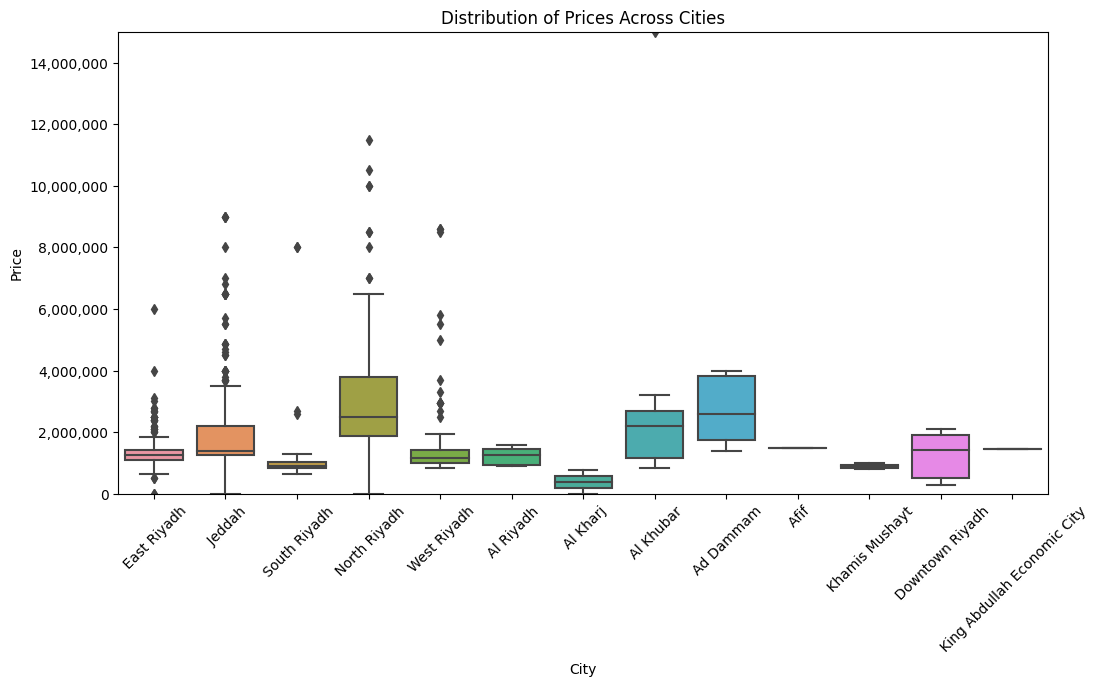

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='price', data=df)
plt.title('Distribution of Prices Across Cities')
plt.xlabel('City')
plt.ylabel('Price')
plt.ylim(0,15000000)
plt.xticks(rotation=45)

# Format the y-axis labels to disable scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()


In [59]:
# average house prices for each city
df.groupby('city')['price'].mean().sort_values(ascending=False)

city
 Al Khubar                     3869230.769
 North Riyadh                  3026505.668
 Ad Dammam                     2716666.667
 Jeddah                        2357606.165
 South Riyadh                  1785595.276
 West Riyadh                   1537285.714
 Afif                          1500000.000
 King Abdullah Economic City   1450000.000
 East Riyadh                   1334181.718
 Downtown Riyadh               1258333.333
 Al Riyadh                     1230000.000
 Khamis Mushayt                 900000.000
 Al Kharj                       385385.000
Name: price, dtype: float64

**Is there a correlation between the number of rooms and prices?**



<ipython-input-60-e12639234904>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


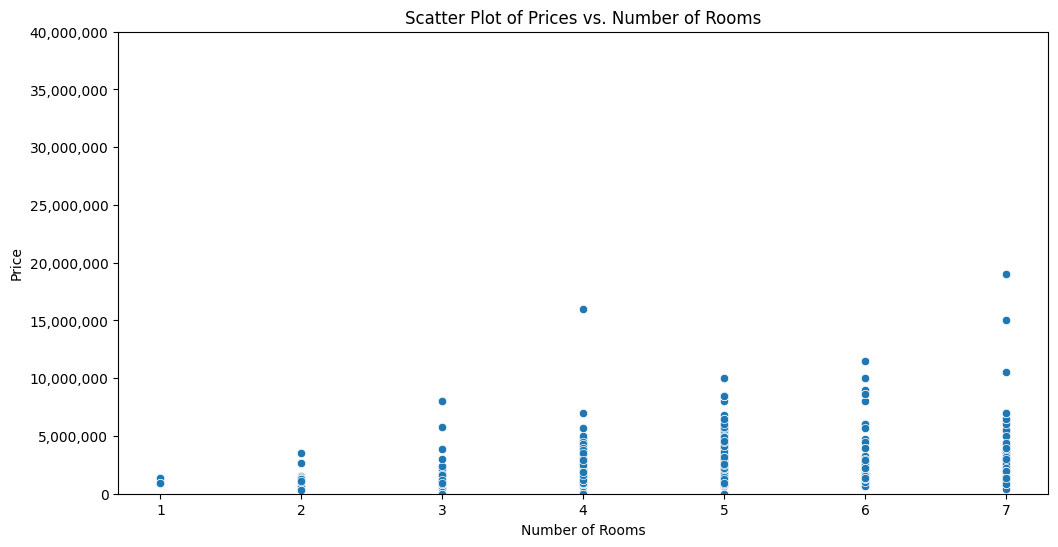

In [60]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='rooms', y='price', data=df)
plt.title('Scatter Plot of Prices vs. Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylim(0,40000000)
plt.ylabel('Price')

# Format the y-axis labels to disable scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

In [61]:
df['rooms'].corr(df['price'])

0.04651475834072023

**from the plot above and the correlation value we can say that** : a correlation coefficient of 0.0465 indicates a very weak positive correlation between the number of rooms and the price. The correlation is close to zero, suggesting that there isn't a strong linear relationship between these two variables. It's important to note that correlation does not imply causation, and other factors could influence the relationship between 'rooms' and 'price.'

**What is the precentage of pools  ?**

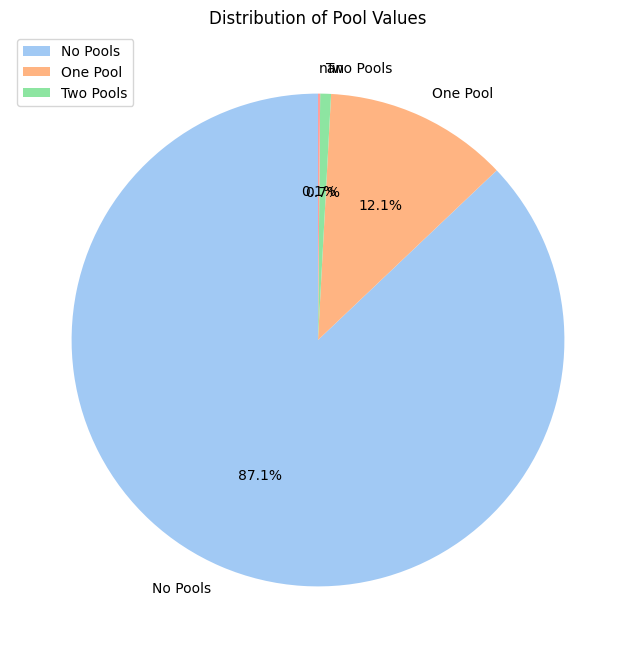

In [62]:

# Assuming 'bool' is the column for which you want to create a pie chart
bool_counts = df['bool'].value_counts()

# Define labels and colors
labels = ['No Pools', 'One Pool', 'Two Pools']
colors = sns.color_palette('pastel')

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(bool_counts, labels=bool_counts.index.map({0: 'No Pools', 1: 'One Pool', 2: 'Two Pools'}), autopct='%1.1f%%', startangle=90, colors=colors)

# Add legend
plt.legend(labels, loc='upper left')

plt.title('Distribution of Pool Values')
plt.show()


**What is the average price across different administrative areas?**



<ipython-input-63-3cc4f02cd607>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


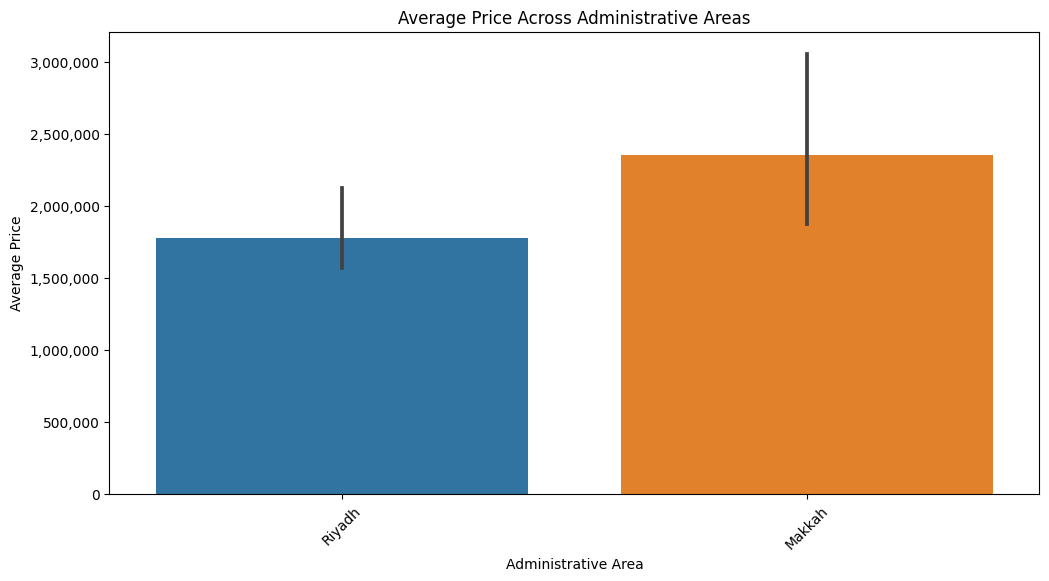

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(x='administritive_area', y='price', data=df)
plt.title('Average Price Across Administrative Areas')
plt.xlabel('Administrative Area')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

# Format the y-axis labels to disable scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()


**How do prices correlate with the size of the property (in square meters)?**



<ipython-input-64-bc689e3e1de0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


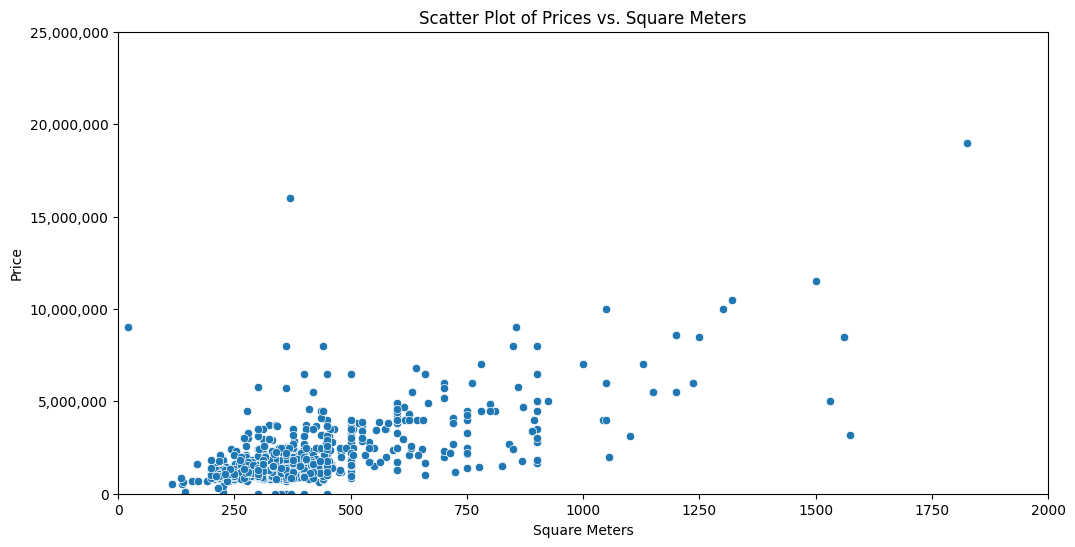

In [64]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='sqm', y='price', data=df)
plt.title('Scatter Plot of Prices vs. Square Meters')
plt.xlim(0,2000)
plt.ylim(0,25000000)
plt.xlabel('Square Meters')
plt.ylabel('Price')

# Format the y-axis labels to disable scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

In [65]:
# the relation between the price and sqm
df.price.corr(df.sqm)

0.0010225882499595286

- from the scatter plot above and the correlation : we see that there is no relation and this is not reasonable
- so we belive that the outliers affect the model too much
- we will clamp the outlier and then calculate the correlation again

### Clamp Outliers

In [66]:
# we understand from the viz the upper limit and lower limit
df['sqm'] = np.clip(df['sqm'], 100, 1300)
df['price'] = np.clip(df['price'], 100000, 10000000)

In [67]:
# check the outliers againg
df.price.corr(df.sqm)

0.6752661108681165

- `0.675` This positive correlation value indicates a moderately strong positive linear relationship between the two variables.

- In simpler terms, as the 'sqm' (square meters) value increases, there is a tendency for the 'price' to also increase, and vice versa.

##### prices correlate  square meters after clamping outliers

<ipython-input-68-bc689e3e1de0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


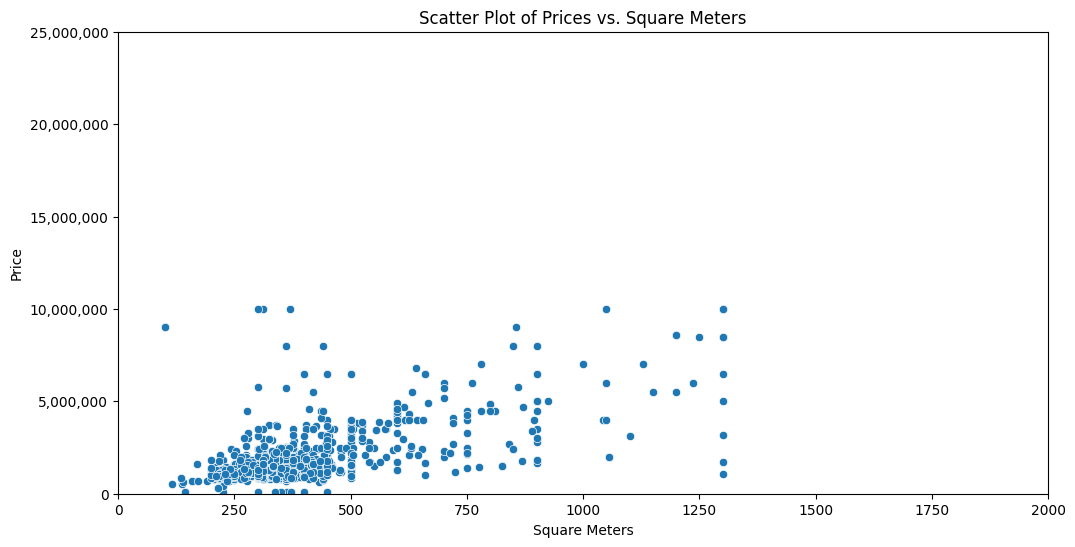

In [68]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='sqm', y='price', data=df)
plt.title('Scatter Plot of Prices vs. Square Meters')
plt.xlim(0,2000)
plt.ylim(0,25000000)
plt.xlabel('Square Meters')
plt.ylabel('Price')

# Format the y-axis labels to disable scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

**What is the count of driver values?**

<ipython-input-69-f3628082dca9>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


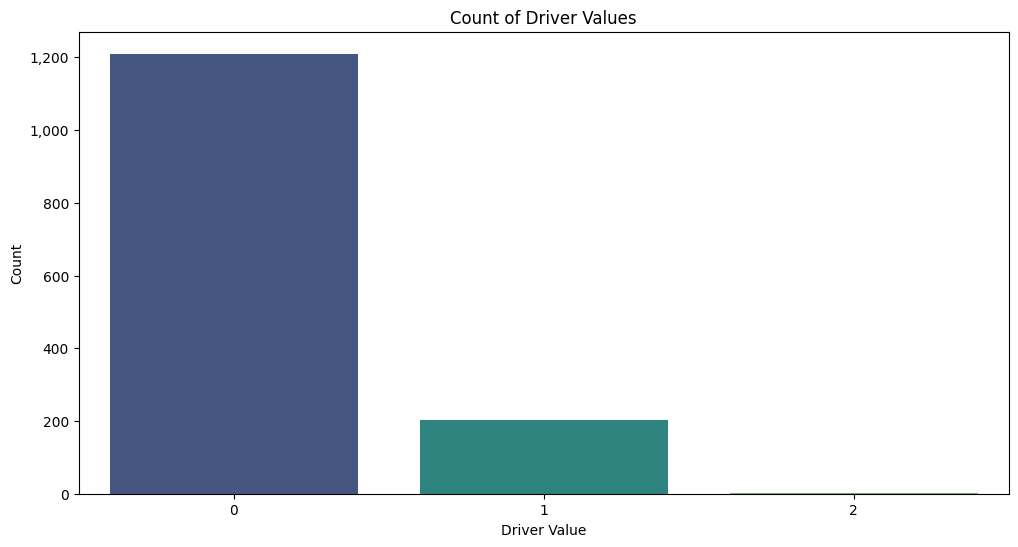

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(x='driver', data=df, palette='viridis')  # You can choose a different color palette if desired
plt.title('Count of Driver Values')
plt.xlabel('Driver Value')
plt.ylabel('Count')

# Format the y-axis labels to disable scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()


**How is the distribution of bathroom counts?**

<ipython-input-70-3f5b03ea6845>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


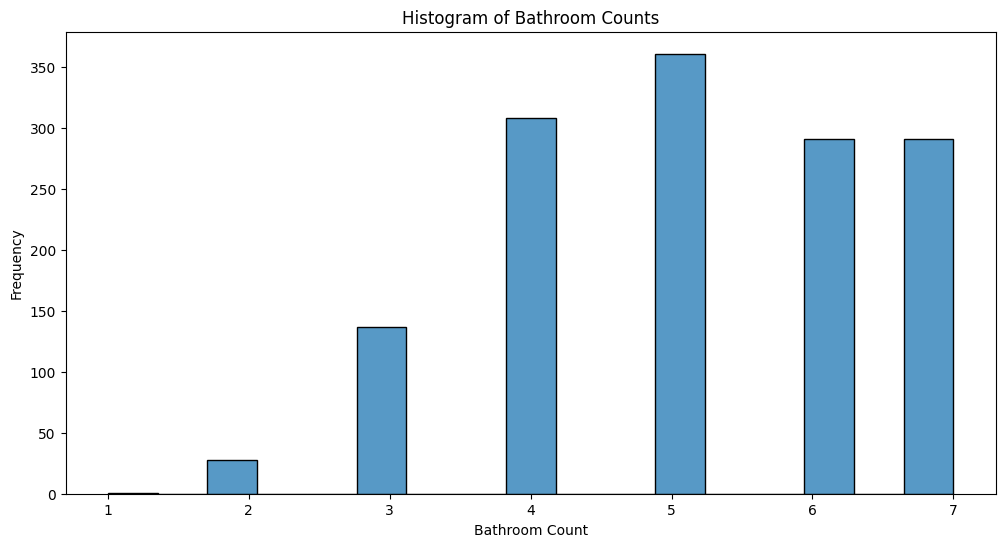

In [70]:
plt.figure(figsize=(12, 6))
sns.histplot(df['bathrooms'], kde=False)
plt.title('Histogram of Bathroom Counts')
plt.xlabel('Bathroom Count')
plt.ylabel('Frequency')

# Format the y-axis labels to disable scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

**Is there a correlation between the presence of a garden and prices?**

<ipython-input-71-3fae0310076b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='garden', y='price', data=df, ci=None)
<ipython-input-71-3fae0310076b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


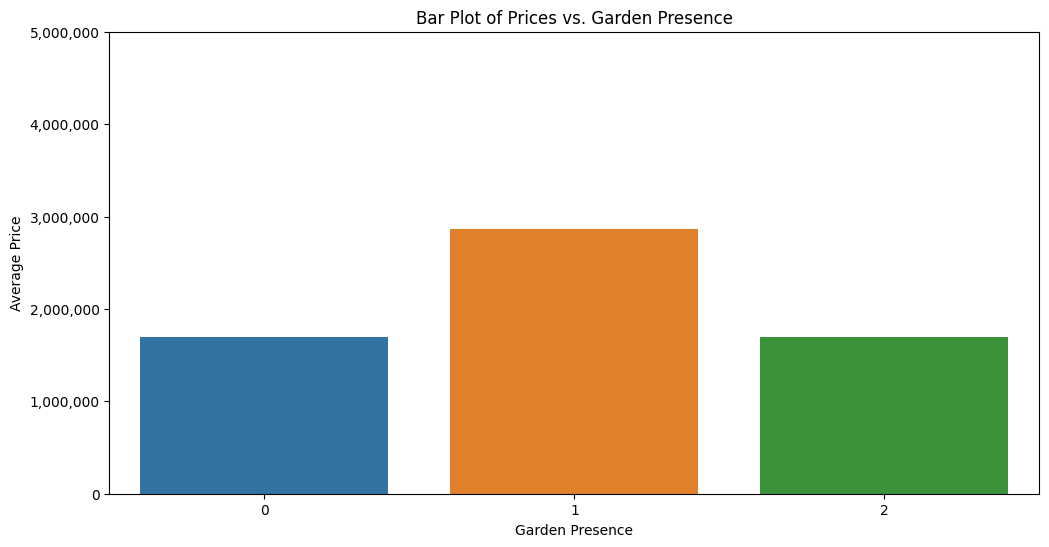

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(x='garden', y='price', data=df, ci=None)
plt.title('Bar Plot of Prices vs. Garden Presence')
plt.ylim(0, 5000000)
plt.xlabel('Garden Presence')
plt.ylabel('Average Price')  # Assuming you want to show the average price for each category

# Format the y-axis labels to disable scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()


**How does the presence of an elevator correlate with prices?**

<ipython-input-72-67cf4da4b390>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


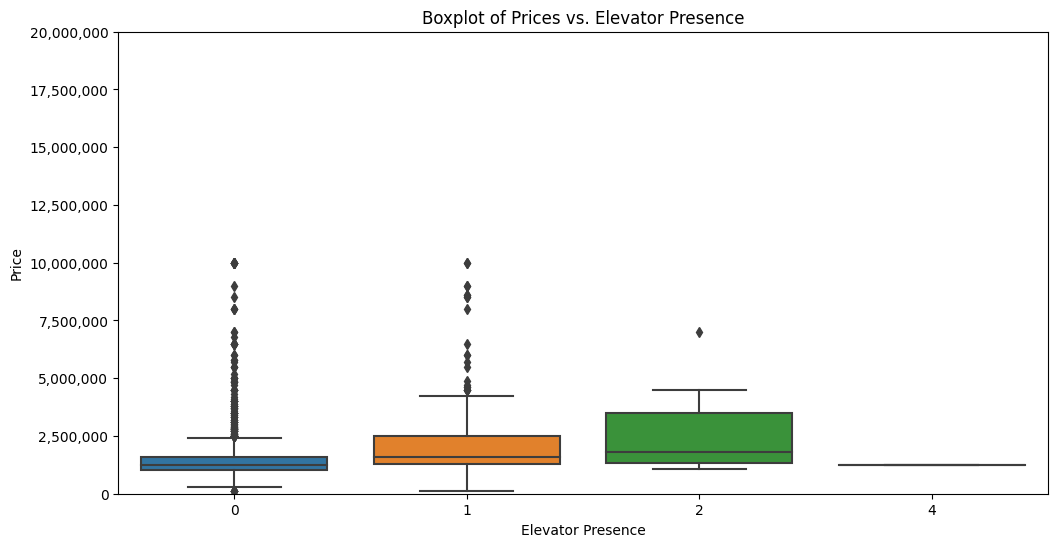

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='elevator', y='price', data=df)
plt.title('Boxplot of Prices vs. Elevator Presence')
plt.xlabel('Elevator Presence')
plt.ylabel('Price')
plt.ylim(0,20000000)
# Format the y-axis labels to disable scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()


**What is the correlation between the number of rooms and prices?**



<ipython-input-73-9bdc075664f0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


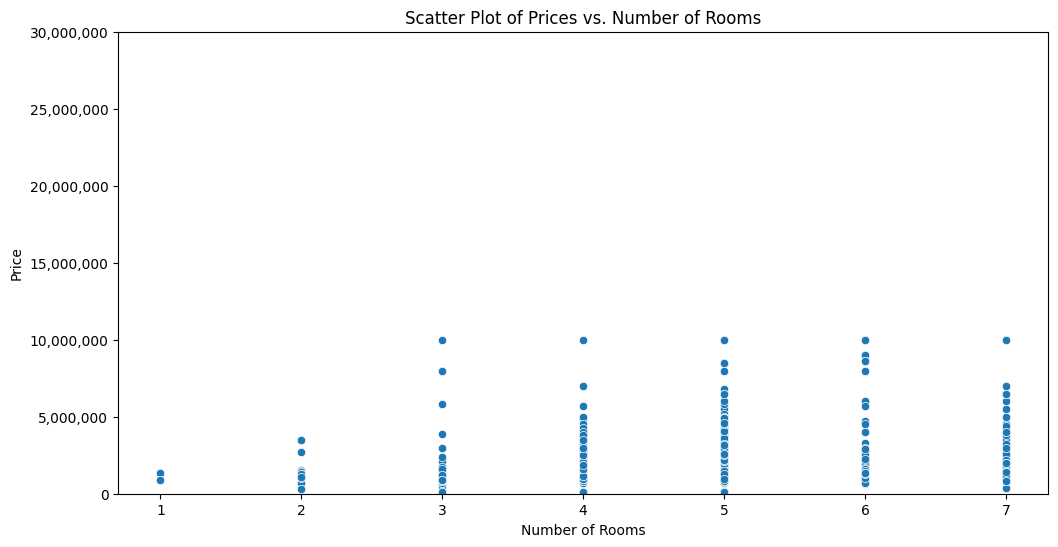

In [73]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='rooms', y='price', data=df)
plt.title('Scatter Plot of Prices vs. Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.ylim(0,30000000)
# Format the y-axis labels to disable scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()


In [74]:
# we need to seperate the numerical columns from the categorical columns
num_cols = list(set(df.describe().columns))
cat_cols = list(set(df.columns) - set(num_cols))



In [75]:
# the correlation matrix take just the numerical columns
corr_matrix = df[num_cols].corr()


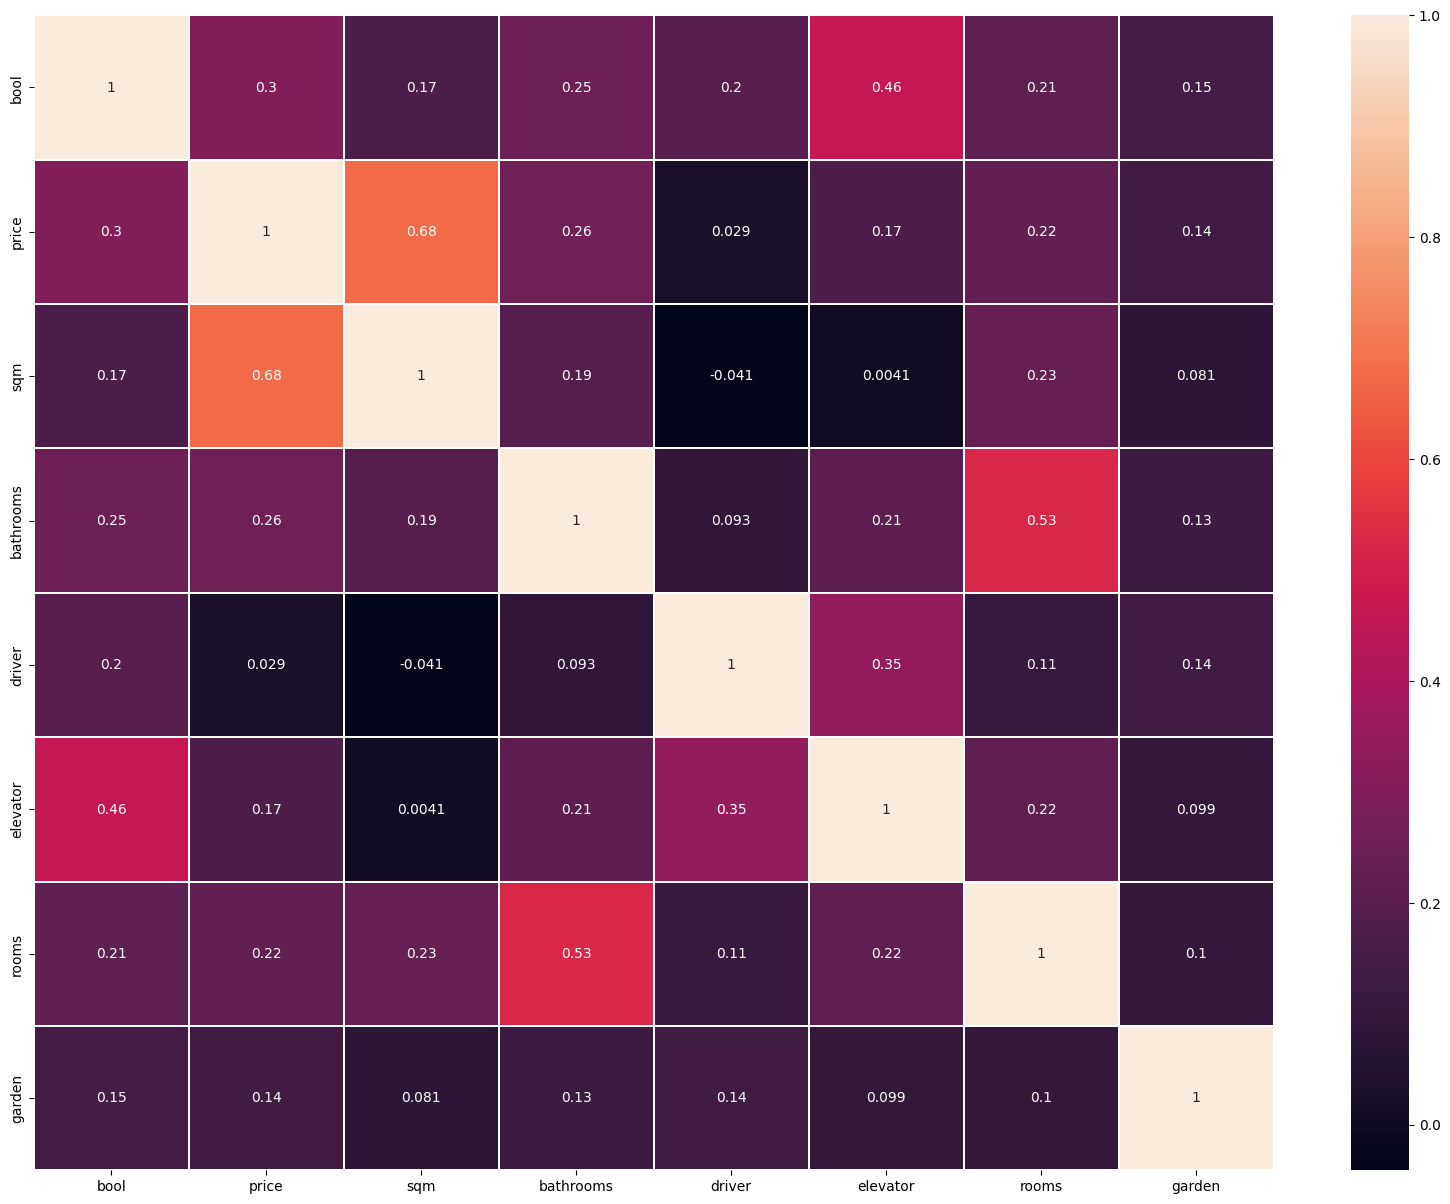

In [76]:
# draw heatmap of the correlation matrix
plt.subplots(figsize = (20, 15))
sns.heatmap(corr_matrix,
           annot = True ,
           xticklabels = corr_matrix.columns.values,
           yticklabels = corr_matrix.columns.values,
           linewidth = 0.1);

In [77]:
df.corr()

<ipython-input-77-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,rooms,bathrooms,sqm,elevator,bool,driver,garden
price,1.000,0.221,0.258,0.675,0.173,0.302,0.029,0.139
rooms,0.221,1.000,0.526,0.234,0.218,0.213,0.111,0.100
bathrooms,0.258,0.526,1.000,0.195,0.209,0.254,0.093,0.128
sqm,0.675,0.234,0.195,1.000,0.004,0.168,-0.041,0.081
elevator,0.173,0.218,0.209,0.004,1.000,0.459,0.349,0.099
bool,0.302,0.213,0.254,0.168,0.459,1.000,0.196,0.147
driver,0.029,0.111,0.093,-0.041,0.349,0.196,1.000,0.138
garden,0.139,0.100,0.128,0.081,0.099,0.147,0.138,1.000


### Categorical Variables Visuals

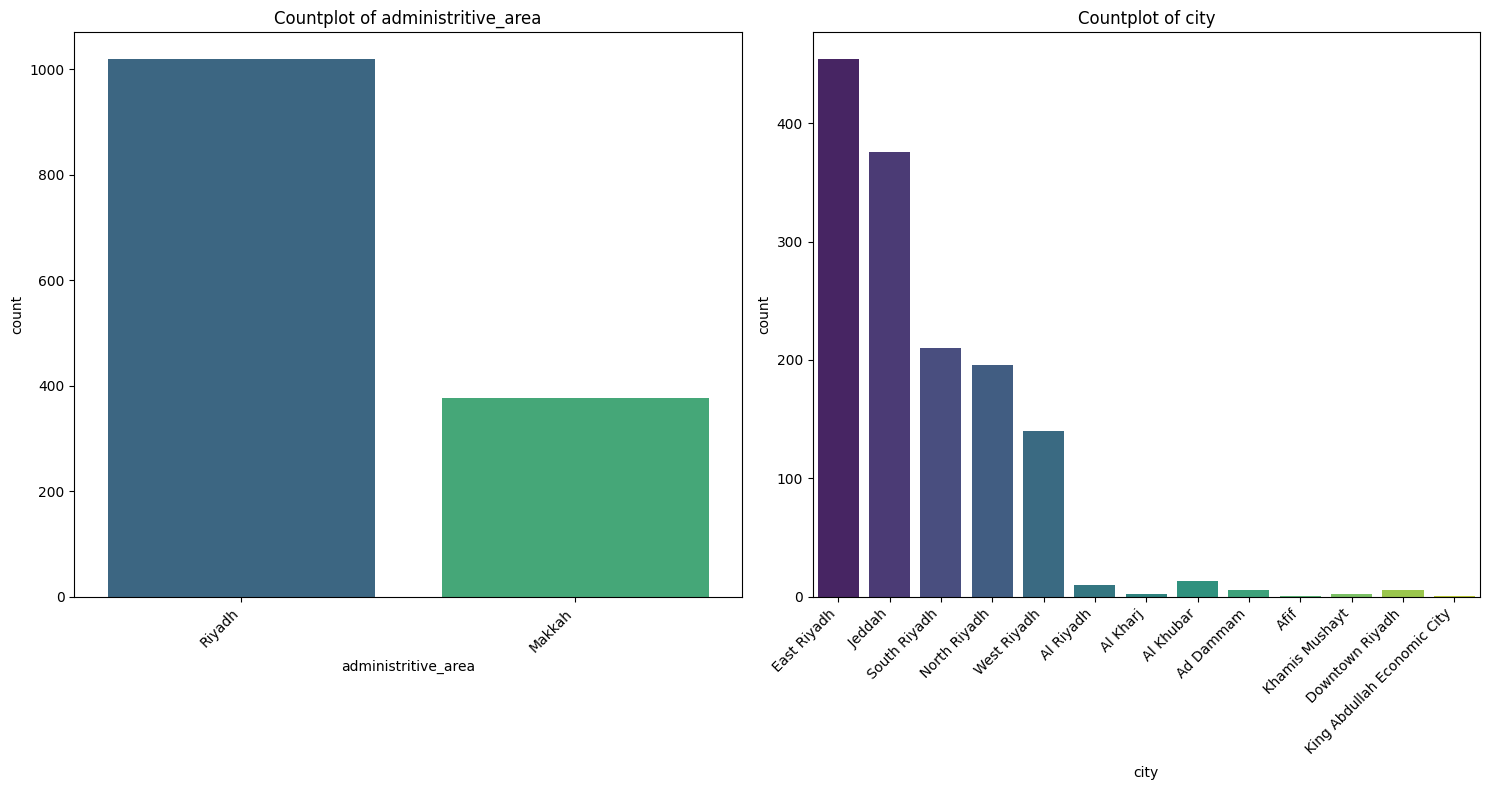

In [78]:
# Assuming 'train_data' is your DataFrame
categorical_cols = ['administritive_area', 'city']

# Plot barplots for categorical columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Data Pre-processing

1- Handling Null Values

3- removing highly correlated features to avoid multi-collinearity as much as we can

4- removing/clamping outliers

5- transforming highly skewed data to reduce their skewness

6- checking for each features whether it follows a normal distribution or not to decide whether to standardize or min-max scale)

7- classify your categorical features into (ordinal and nominal) to decide which features will be label encoded and which features should be OHE

In [79]:
# drop neighborhood_name because it doesn't contribute significantly to predicting the price

del df['neighborhood_name']

In [80]:
# update the columns after dropping any column
num_cols = list(set(df.describe().columns))
cat_cols = list(set(df.columns) - set(num_cols))


#### Handling NULL values

In [81]:
# check if there is null values to handle it
nulls_df = df.isna().sum().reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]

,index,Nulls_Count
1,administritive_area,21


In [82]:
df = df.dropna(axis = 0, subset =['administritive_area'])

In [83]:
# after we drop the null rows we make sure that we git rid of them
nulls_df = df.isna().sum().reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]

,index,Nulls_Count


### Dropping any column which has 80% of values with the same value

- because the model will consider the rare values noise and this will make our model worest

In [84]:
# drop the the columns
del df['garden']
del df['bool']
del df['driver']


In [85]:
# update the columns after dropping any column
num_cols = list(set(df.describe().columns) - set(['elevator', 'rooms','bathrooms']))
cat_cols = list(set(df.columns) - set(num_cols) - set(['elevator', 'rooms','bathrooms']))

In [86]:
# check the columns to make sure that we drop the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1396 entries, 0 to 1416
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                1396 non-null   float64
 1   administritive_area  1396 non-null   object 
 2   city                 1396 non-null   object 
 3   rooms                1396 non-null   int64  
 4   bathrooms            1396 non-null   int64  
 5   sqm                  1396 non-null   int64  
 6   elevator             1396 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 87.2+ KB


### Preprocessing / Transformation

In [87]:

from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named 'df'
# Splitting into features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

In [88]:
from random import shuffle
from sklearn.model_selection import train_test_split
# Splitting into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True , random_state=42)


### Min-max Scaling Numerical Features / Handling Categorical features

In [89]:
# MinMax Scaling 'sqm' and 'price' in features
min_max_scaler = MinMaxScaler()
X_train[['sqm']] = min_max_scaler.fit_transform(X_train[['sqm']])
X_test[['sqm']] = min_max_scaler.transform(X_test[['sqm']])

# Notice that we use [[]] to not get null values

In [90]:
# Getting dummies for categorical columns 'city' and 'administritive_area'
X_train = pd.get_dummies(X_train, columns=['city', 'administritive_area'])
X_test = pd.get_dummies(X_test, columns=['city', 'administritive_area'])


In [91]:
# MinMax Scaling 'price' in target
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

In [92]:
X_train

,rooms,bathrooms,sqm,elevator,city_ Afif,city_ Al Kharj,city_ Al Riyadh,city_ Downtown Riyadh,city_ East Riyadh,city_ Jeddah,city_ King Abdullah Economic City,city_ North Riyadh,city_ South Riyadh,city_ West Riyadh,administritive_area_Makkah,administritive_area_Riyadh
598,5,2,0.542,0,0,0,0,0,1,0,0,0,0,0,0,1
1082,2,5,0.083,0,0,0,0,0,0,0,0,0,0,1,0,1
823,4,3,0.217,0,0,0,0,0,0,0,0,1,0,0,0,1
715,4,6,0.133,0,0,0,0,0,1,0,0,0,0,0,0,1
489,4,4,0.239,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,4,3,0.275,0,0,0,0,0,1,0,0,0,0,0,0,1
1146,7,6,0.125,0,0,0,0,0,0,1,0,0,0,0,1,0
1313,5,5,0.292,1,0,0,0,0,0,0,0,1,0,0,0,1
870,4,4,0.125,0,0,0,0,0,1,0,0,0,0,0,0,1


In [93]:
X_test

,rooms,bathrooms,sqm,elevator,city_ Al Kharj,city_ Al Riyadh,city_ Downtown Riyadh,city_ East Riyadh,city_ Jeddah,city_ North Riyadh,city_ South Riyadh,city_ West Riyadh,administritive_area_Makkah,administritive_area_Riyadh
808,5,7,0.281,0,0,0,0,0,0,1,0,0,0,1
1035,3,6,0.217,0,0,0,0,0,0,0,1,0,0,1
883,4,4,0.172,1,0,0,0,0,0,1,0,0,0,1
629,3,3,0.177,0,0,0,0,1,0,0,0,0,0,1
1387,6,5,0.117,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,4,4,0.119,0,0,0,0,1,0,0,0,0,0,1
1350,4,5,0.140,0,0,0,0,1,0,0,0,0,0,1
551,3,4,0.229,0,0,0,0,0,0,0,0,1,0,1
48,4,5,0.167,1,0,0,0,0,1,0,0,0,1,0


In [94]:
# get the common_columns and X_test
common_columns = list(set(X_train.columns) & set(X_test.columns))

# Keep only the common columns in X_train and X_test
X_train = X_train[common_columns]
X_test = X_test[common_columns]



### Linear Regression Model

In [95]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [96]:
# the accuracy of the linear regression model for the training set
reg.score(X_train, y_train)

0.5389626789610142

In [97]:
# the accuracy of the linear regression model for the testing set
reg.score(X_test, y_test)

0.6580892715444819

In [98]:
# the preditions
predicted = reg.predict(X_test)

### Evaluating our linear regression model

In [99]:
def mse(actual, predicted):
    return np.mean(np.square(actual - predicted))

def rmse(actual, predicted):
    return np.sqrt(np.mean(np.square(actual - predicted)))

def mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))


# Make sure both y_train and predicted have the same number of elements
y_train = y_train[:len(predicted)]

# Now calculate the metrics
print('The mean squared error is:', mse(y_train, predicted))
print('The root mean squared error is:', rmse(y_train, predicted))



The mean squared error is: 0.02685325668124191
The root mean squared error is: 0.16386963318822043


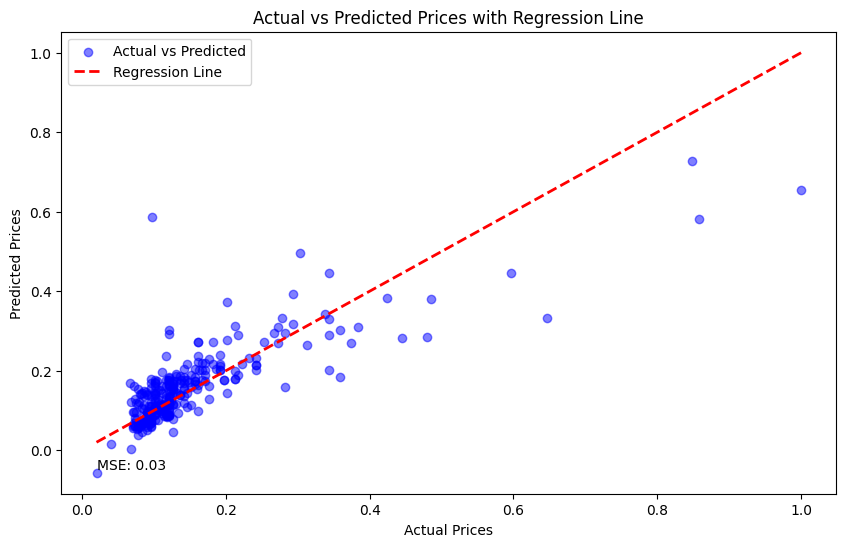

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted, alpha=0.5, color='blue', label='Actual vs Predicted')

# Plotting the regression line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Regression Line')

# Adding labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices with Regression Line')

# Display the mean squared error in the bottom left
mse_value = mse(y_train, predicted)
plt.text(min(y_test), min(predicted), f'MSE: {mse_value:.2f}', color='black', ha='left', va='bottom')

# Display the plot
plt.legend()
plt.show()


# Analysis & Results:
## Overview:
- From Our analysis we notice that the data has an aggressive affect the distrbution of the price and the correlation between the price and other features  

## Correlation Matrix:
### Price Correlations:
- Rooms: 0.220
- Bathrooms: 0.257
- SQM (Square Meters): 0.681 stronge one after clamping the outerliers
- Elevator: 0.185

### Key Findings:
#### Strong Positive Correlations:
- Rooms and Bathrooms: 0.527
- Bathrooms and SQM: 0.190
- Elevator and Bool: 0.212

#### Weak Correlations:
- Price and SQM: 0.681
- Price and Driver: -0.009

## Recommendations & Conclusion:
### Important Features:
- Rooms and bathrooms exhibit a significant positive correlation, suggesting that properties with more rooms tend to have more bathrooms.
- Elevator and Bool (assumption: a feature indicating the presence of a building security system) are positively correlated, indicating potential connections between building amenities.

### Notable Insights:
- The strong correlation between price and SQM suggests that the size is a significant driver of property prices.
- The negative correlation between driver and garden indicates a potential trade-off; properties with drivers may have smaller garden spaces.

## Considerations:
While correlations provide insights, causation cannot be directly inferred. Further analysis is needed to understand the factors influencing property prices.

## Future Research:
- Explore additional features or external factors that may influence property prices.
- Conduct regression analysis for a more in-depth understanding of the relationship between variables.

## Conclusion:
The correlation matrix provides a valuable snapshot of potential relationships between variables. However, a comprehensive understanding of property prices requires additional analysis and consideration of various factors. This report serves as a starting point for further exploration and analysis based on the dataset provided.
